# Sentiment Analysis of Airline Reviews

In [1]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import nltk
import spacy
nlp = spacy.load('en_core_web_lg')
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec

In [2]:
df = pd.read_csv('airline_df_cleaned.csv')
reviews = df[['Country','Airline','Review','Review_LS','Sentiment']].copy(deep=True)
reviews.head()

,Country,Airline,Review,Review_LS,Sentiment
0,China,Air China,los angeles beijing return. food low quality s...,los angeles beijing return . food quality staf...,0
1,China,Air China,round trip from hong kong to munich. the main ...,round trip hong kong munich . main reason fly ...,0
2,China,Air China,sydney beijing paris then rome beijing to sydn...,sydney beijing paris rome beijing sydney famil...,0
3,China,Air China,london to sydney return via beijing. a cheap f...,london sydney return beijing . cheap flight li...,0
4,China,Air China,beijing to shanghai. only one check in desk fo...,beijing shanghai . check desk standby passenge...,1


In [3]:
reviews['Review'][0]

'los angeles beijing return. food low quality staff appeared when time for mandatory service large screen viewing on main bulkhead without sound on both trips. they were older 747s. it seems staff had something to say at irregular intervals making it hard to try and sleep but they were very good at making business transactions ignoring everyone so they could count money and look at receipts. you want a cheap very basic airline trip to china then this is the airline for you.'

In [4]:
reviews['Review_LS'][0]

'los angeles beijing return . food quality staff appear time mandatory service large screen view main bulkhead sound trip . 747 . staff irregular interval hard sleep business transaction ignore count money receipt . cheap basic trip china .'

In [5]:
# Tokenizing the each review using word_tokenize
corpus = []
for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review'][i])
    review = ' '.join(review)
    corpus.append(review)

corpus[0]

'los angeles beijing return . food low quality staff appeared when time for mandatory service large screen viewing on main bulkhead without sound on both trips . they were older 747s . it seems staff had something to say at irregular intervals making it hard to try and sleep but they were very good at making business transactions ignoring everyone so they could count money and look at receipts . you want a cheap very basic airline trip to china then this is the airline for you .'

In [6]:
corpus = [word_tokenize(x)for x in corpus]
print(corpus[0])

['los', 'angeles', 'beijing', 'return', '.', 'food', 'low', 'quality', 'staff', 'appeared', 'when', 'time', 'for', 'mandatory', 'service', 'large', 'screen', 'viewing', 'on', 'main', 'bulkhead', 'without', 'sound', 'on', 'both', 'trips', '.', 'they', 'were', 'older', '747s', '.', 'it', 'seems', 'staff', 'had', 'something', 'to', 'say', 'at', 'irregular', 'intervals', 'making', 'it', 'hard', 'to', 'try', 'and', 'sleep', 'but', 'they', 'were', 'very', 'good', 'at', 'making', 'business', 'transactions', 'ignoring', 'everyone', 'so', 'they', 'could', 'count', 'money', 'and', 'look', 'at', 'receipts', '.', 'you', 'want', 'a', 'cheap', 'very', 'basic', 'airline', 'trip', 'to', 'china', 'then', 'this', 'is', 'the', 'airline', 'for', 'you', '.']


In [7]:
# Building the Word2Vec model

gensim_model = Word2Vec(vector_size=100, window=5, min_count=2, workers=4, seed=42)

gensim_model.build_vocab(corpus)

gensim_model.train(corpus, total_examples=gensim_model.corpus_count, epochs=gensim_model.epochs)


(7618742, 10825195)

In [8]:
gensim_model.wv.most_similar('airline')

[('company', 0.7805589437484741),
 ('carrier', 0.7568610310554504),
 ('airlines', 0.6489673852920532),
 ('review', 0.5939369797706604),
 ('sia', 0.5819534063339233),
 ('emirates', 0.5814405679702759),
 ('spicejet', 0.5455265641212463),
 ('ana', 0.5415958166122437),
 ('route', 0.5249724388122559),
 ('carriers', 0.5238105654716492)]

In [9]:
gensim_model.wv.similarity('india', 'china')

0.9100336

In [10]:
reviews.to_csv('airline_df_nlped.csv',index=False)

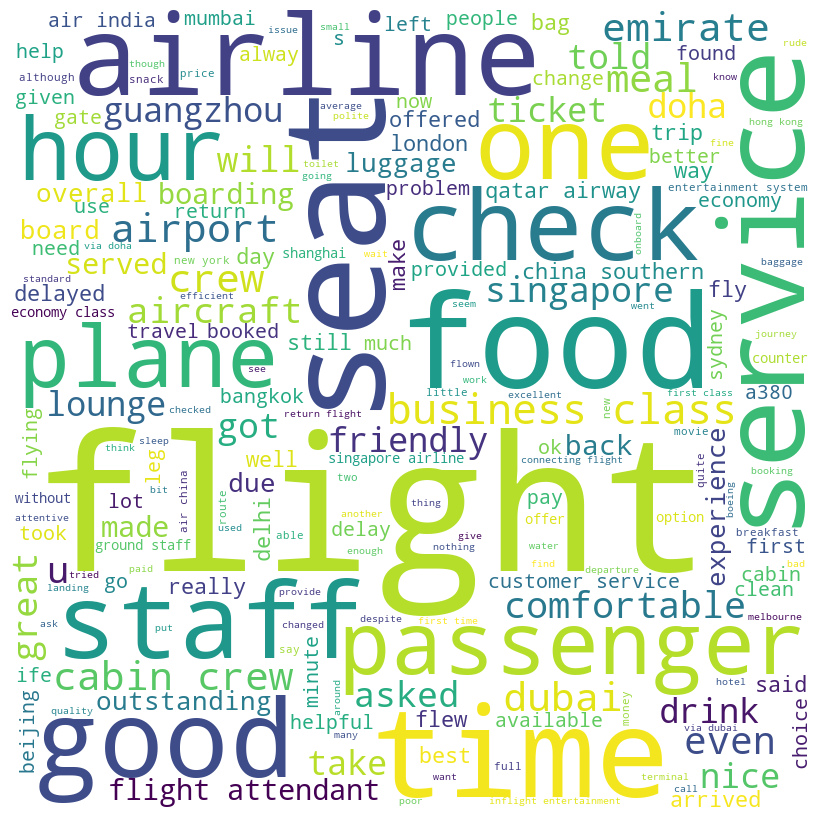

In [12]:
# Making a word cloud from the reviews2

corp = []

for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review'][i])
    review = ' '.join(review)
    corp.append(review)
    
corp = [word_tokenize(x)for x in corp]

corp = [item for sublist in corp for item in sublist]

corp = ' '.join(corp)

corp

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corp)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

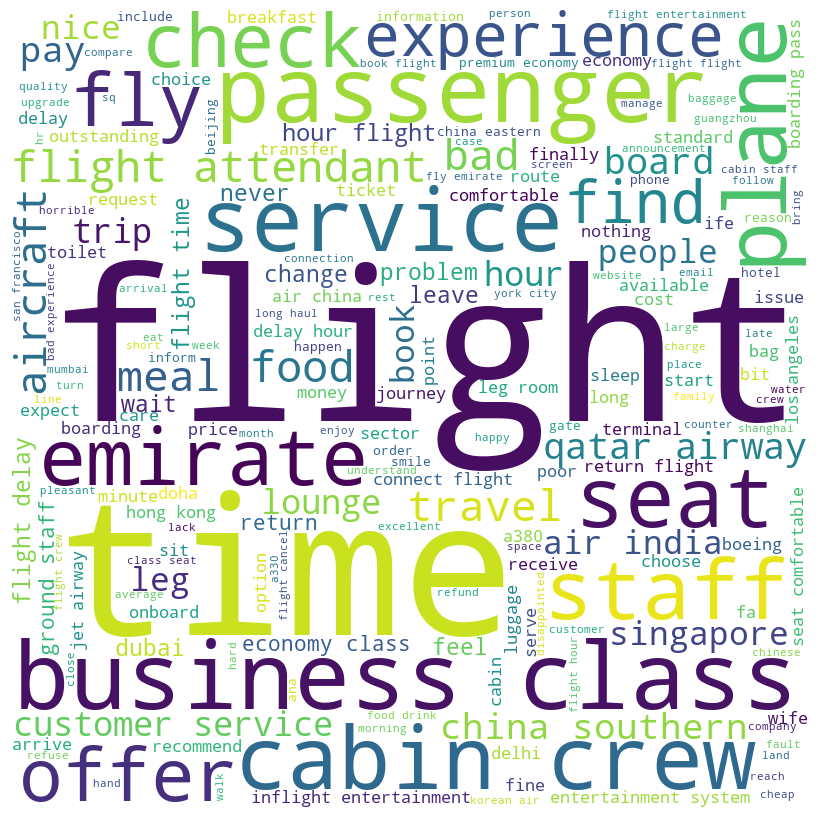

In [14]:
# Making a word cloud from the reviews2

corp = []

for i in range(0, len(reviews)):
    review = word_tokenize(reviews['Review_LS'][i])
    review = ' '.join(review)
    corp.append(review)
    
corp = [word_tokenize(x)for x in corp]

corp = [item for sublist in corp for item in sublist]

corp = ' '.join(corp)

corp

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(corp)

# plot the WordCloud image

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()